In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'
plt.style.use('fivethirtyeight')
import plotly.plotly as py
from mpl_toolkits.basemap import Basemap

In [2]:
terror_data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='ISO-8859-1', low_memory=False)

terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                        'attacktype1_txt':'AttackType','target1':'Target', 'natlty1_txt':'Nationality', 'nkill':'Killed', 
                        'nwound':'Wounded', 'summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                        'weaptype1_txt':'Weapon_type', 'motive':'Motive'},inplace=True)

In [3]:
terror = terror_data[['Year', 'Month', 'Day', 'Country', 'Region', 'AttackType', 'Target', 'Target_type', 'Nationality', 'Weapon_type',
                     'Killed', 'Wounded', 'Group', 'Motive', 'latitude', 'longitude']]

terror['Casualties'] = terror['Killed'] + terror['Wounded']

In [4]:
# number of terrorists (globally) from a given nationality (natly)
natly = terror['Nationality'].value_counts()

In [5]:
'''List of majority muslim countries (mmc) that will be used to calculate
the percentage (%) of terrorists that are muslim'''

mmc_list = {'Indonesia', 'Pakistan', 'Bangladesh', 'Iran', 'Turkey', 'Egypt', 'Algeria',
            'Morocco', 'Iraq', 'Sudan', 'Saudi Arabia', 'Afghanistan', 'Uzbekistan',
            'Yemen', 'Syria', 'Niger', 'Malaysia', 'Niger', 'Somalia'}

In [6]:
terror_mmc = terror[terror['Nationality'].isin(list(mmc_list))]
terror_mmc.sort_values(by='Nationality',inplace=True)

In [7]:
print('Total terrorist incidents from a Muslim majority country since 1970: %s') % terror_mmc['Nationality'].count()
print('Total number of terror incidents worldwide since 1970: %s') % terror['Year'].count()

mmc_incidents = float(terror_mmc['Nationality'].count())
total_incidents = float(terror['Year'].count())
perc_mmc = (mmc_incidents/total_incidents)*100

print('Percent of total terror incidents from a Muslim majority country since 1970: %s') % perc_mmc


Total terrorist incidents from a Muslim majority country since 1970: 65739
Total number of terror incidents worldwide since 1970: 170350
Percent of total terror incidents from a Muslim majority country since 1970: 38.59054887


In [8]:
terror['Killed'] = terror['Killed'].fillna(value=0).astype(int)
terror['Wounded'] = terror['Wounded'].fillna(value=0).astype(int)

In [9]:
terryCount = terror['Year'].value_counts().reset_index()
terryCount.columns = ['Year', 'Incidents']
terryCount.sort_values(by='Year', inplace=True)

Text(0.5,1,u'Muslim Majority Terrorism')

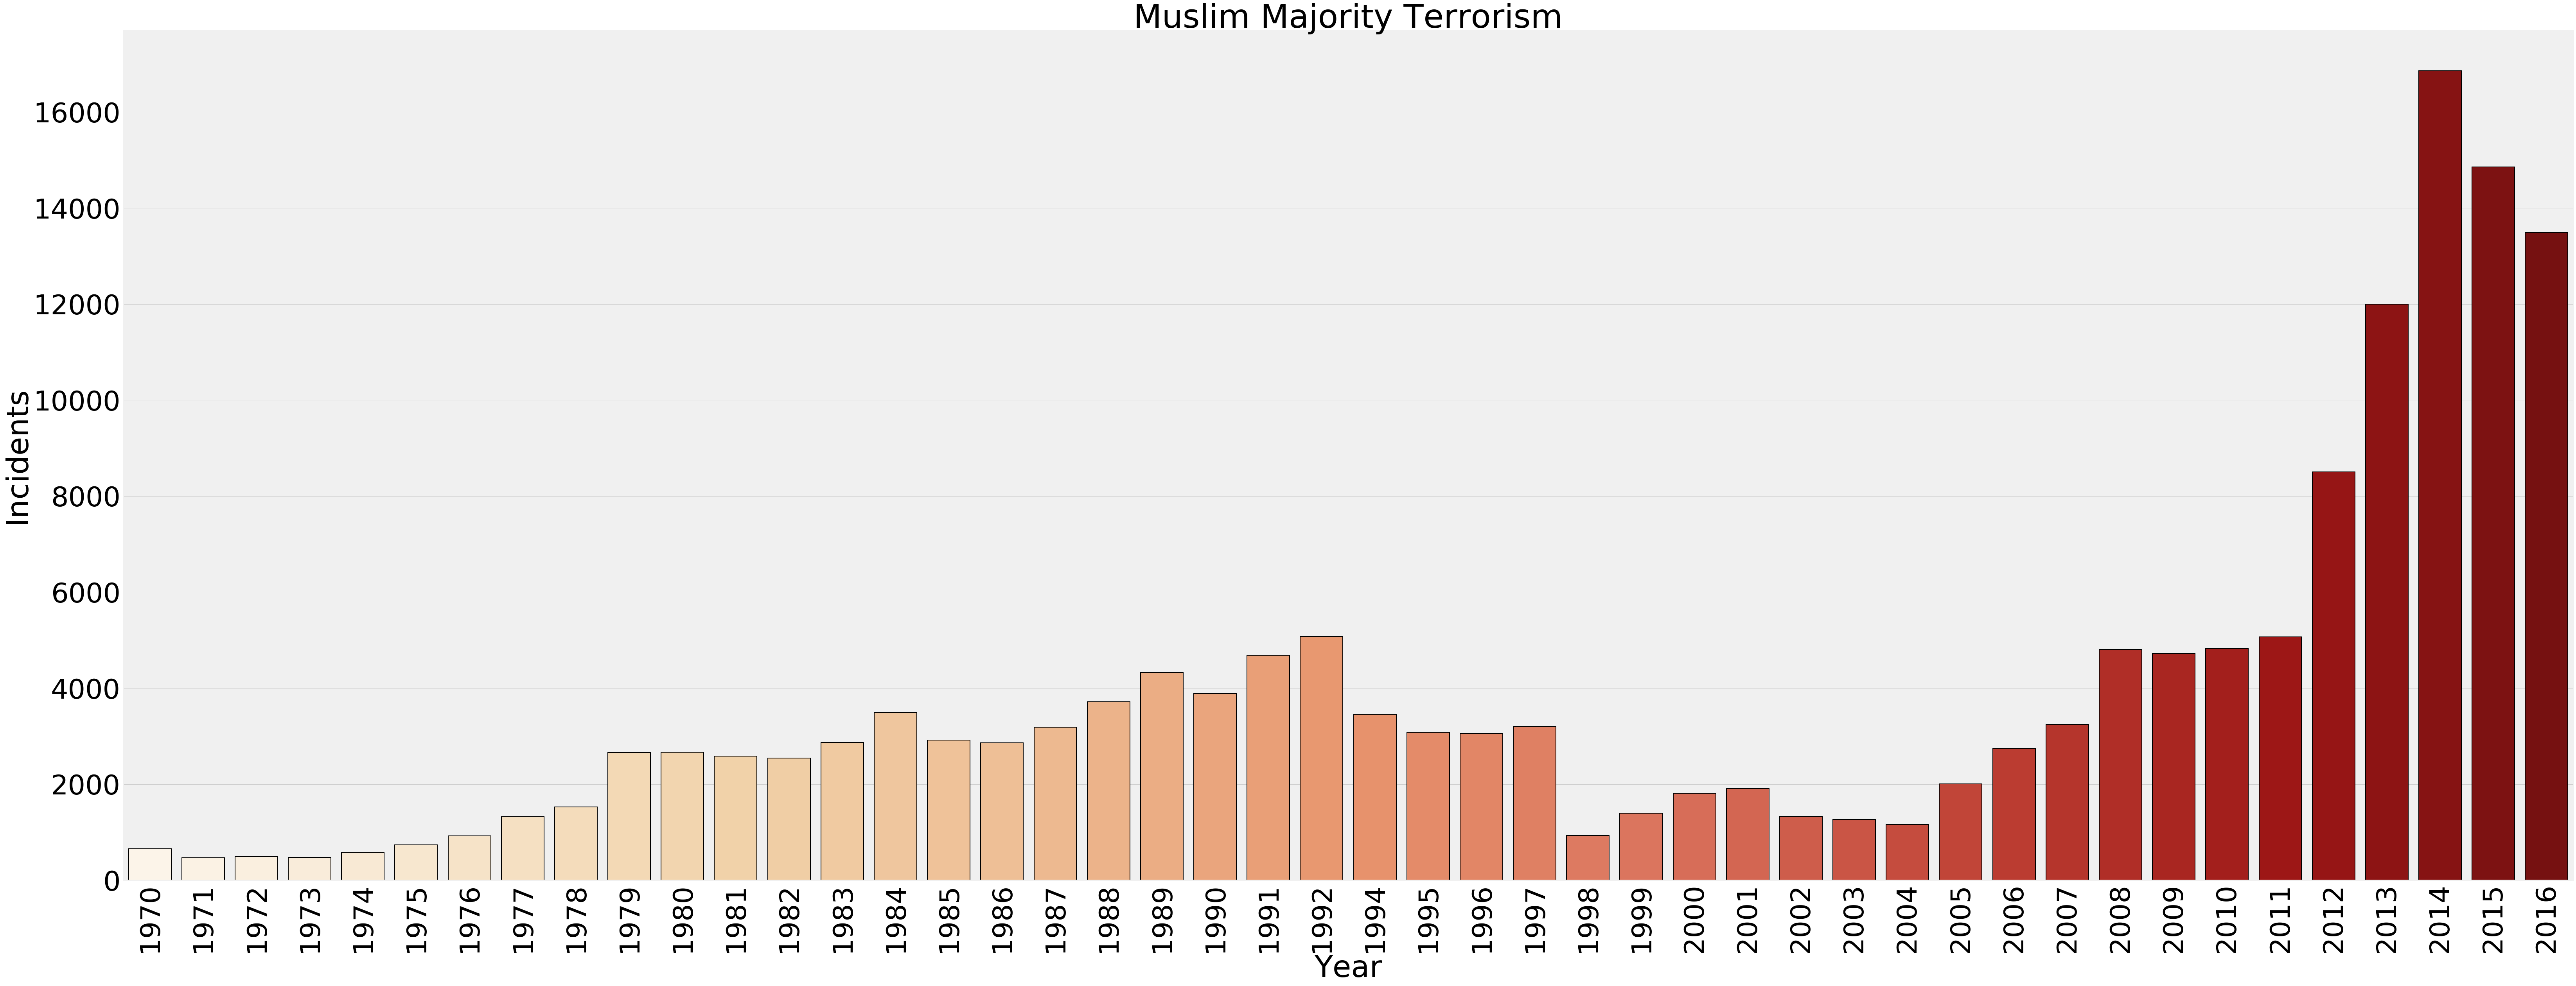

In [10]:
# number of terror incidents per year
plt.figure(figsize=(100,40))
sns.set_context('notebook', font_scale=7.0)
color_pal=sns.color_palette(palette='OrRd', n_colors=len(terryCount['Year']))
g = sns.barplot(x='Year', y='Incidents', data=terryCount, palette=color_pal, edgecolor='black', linewidth=2.0)
plt.xticks(rotation=90)
plt.title('Muslim Majority Terrorism')

In [11]:
#terryCount = terror['Year'].value_counts()

Text(0.5,1,u'Global Terrorism by Type')

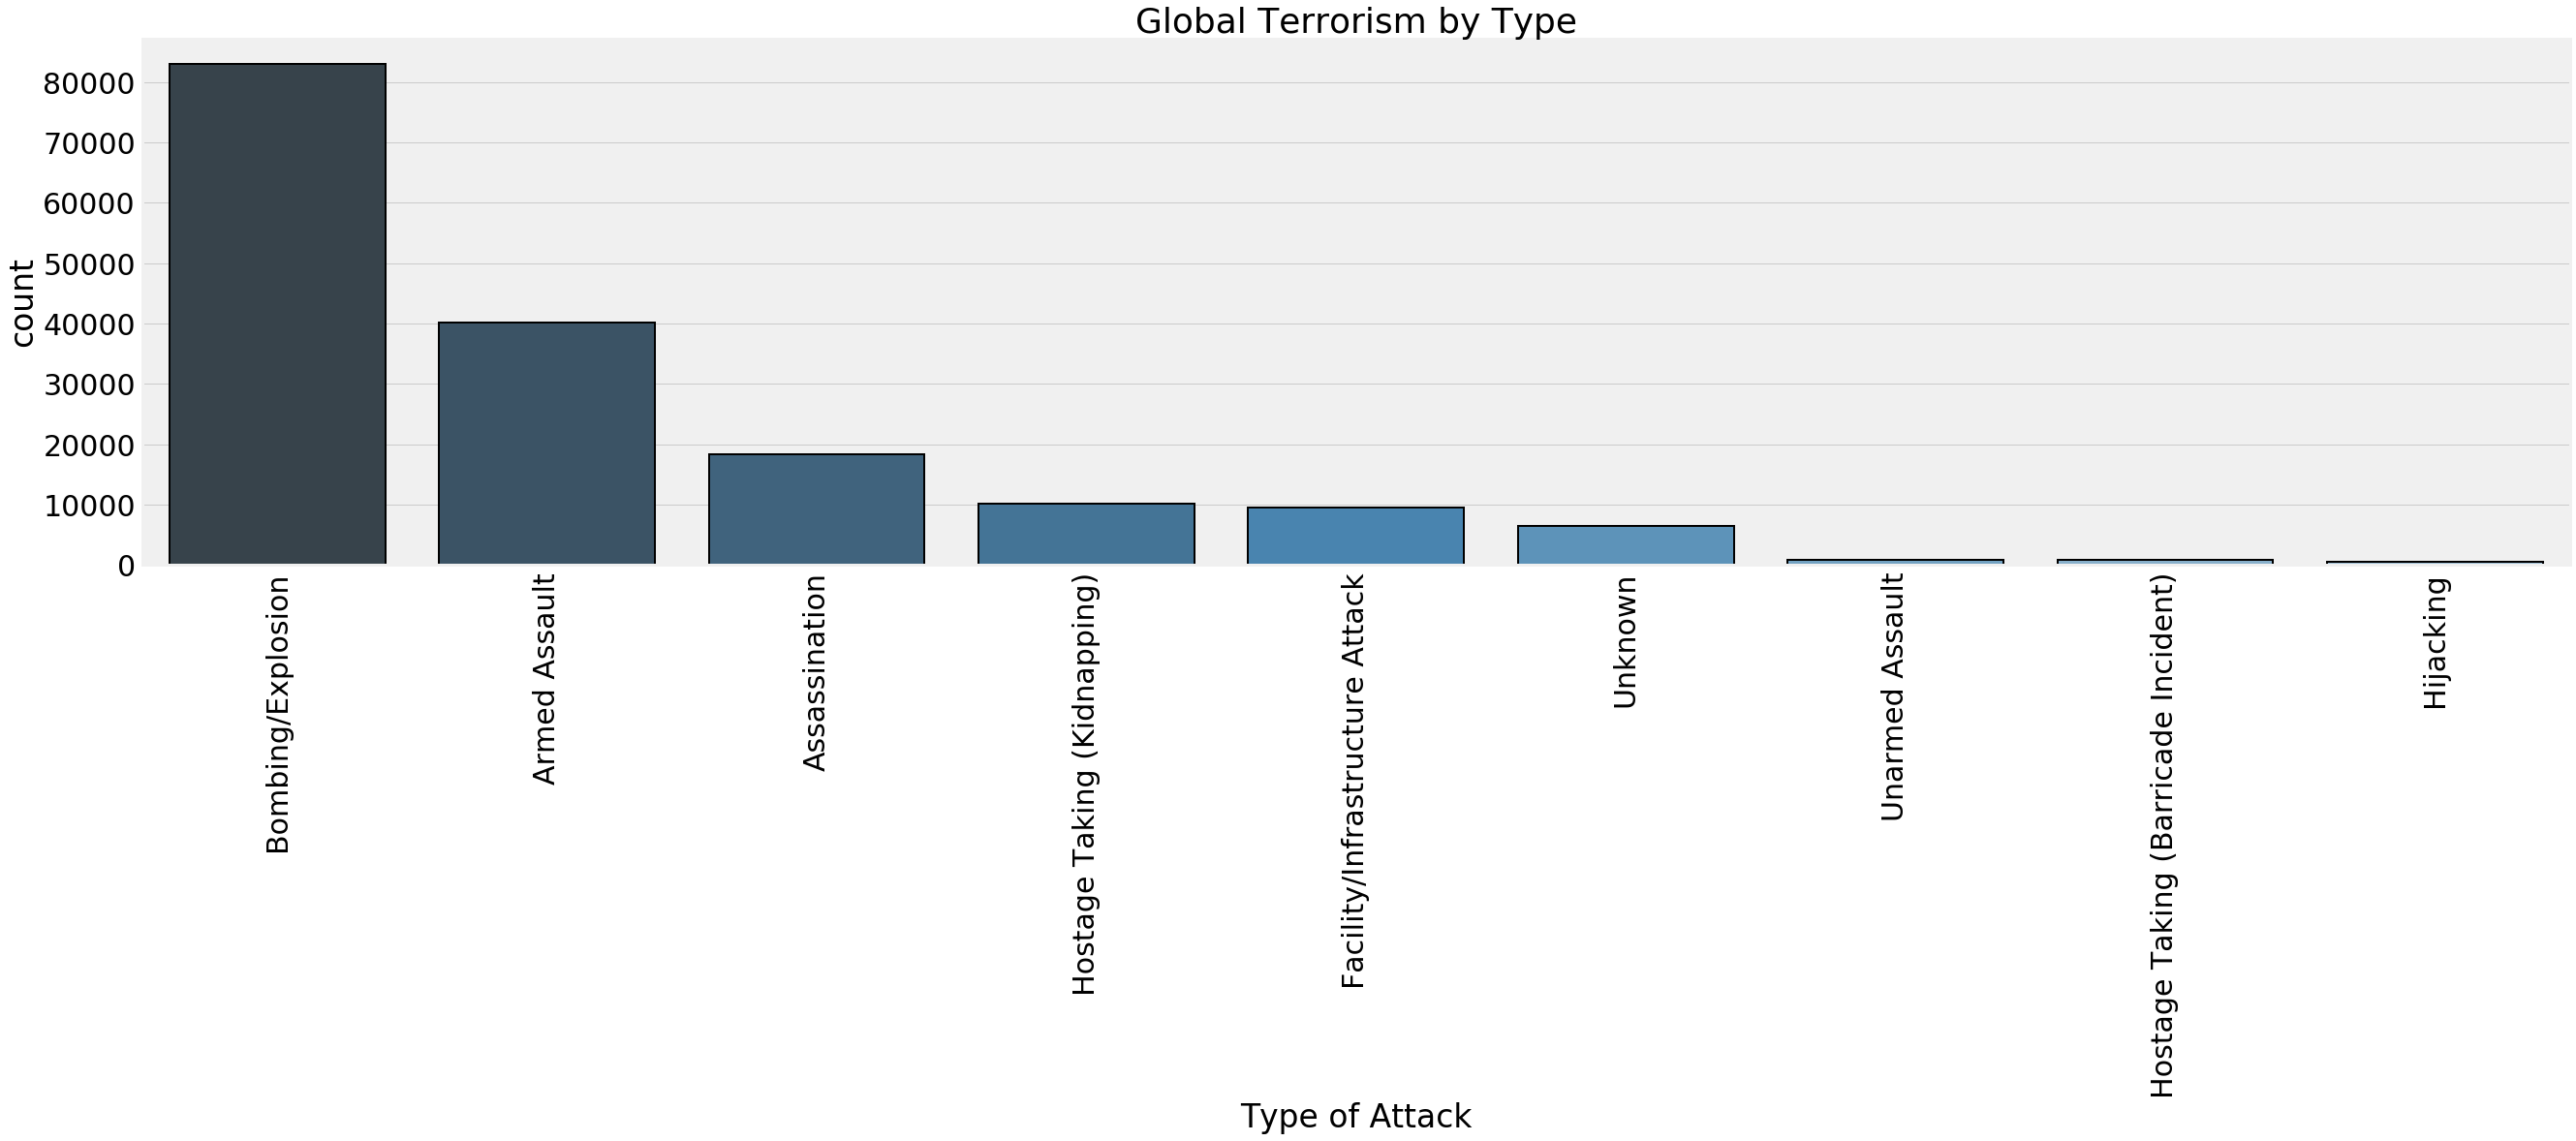

In [12]:
plt.figure(figsize=(40,10))
sns.set_context('notebook', font_scale=3.0)
g = sns.countplot(x='AttackType', data=terror, palette='Blues_d', order=terror['AttackType'].value_counts().index,
                 edgecolor = 'black', linewidth = 2.0)
plt.xticks(rotation=90)
plt.xlabel('Type of Attack')
plt.title('Global Terrorism by Type')

Text(0.5,1,u'Global Terrorism by Favorite Target Type')

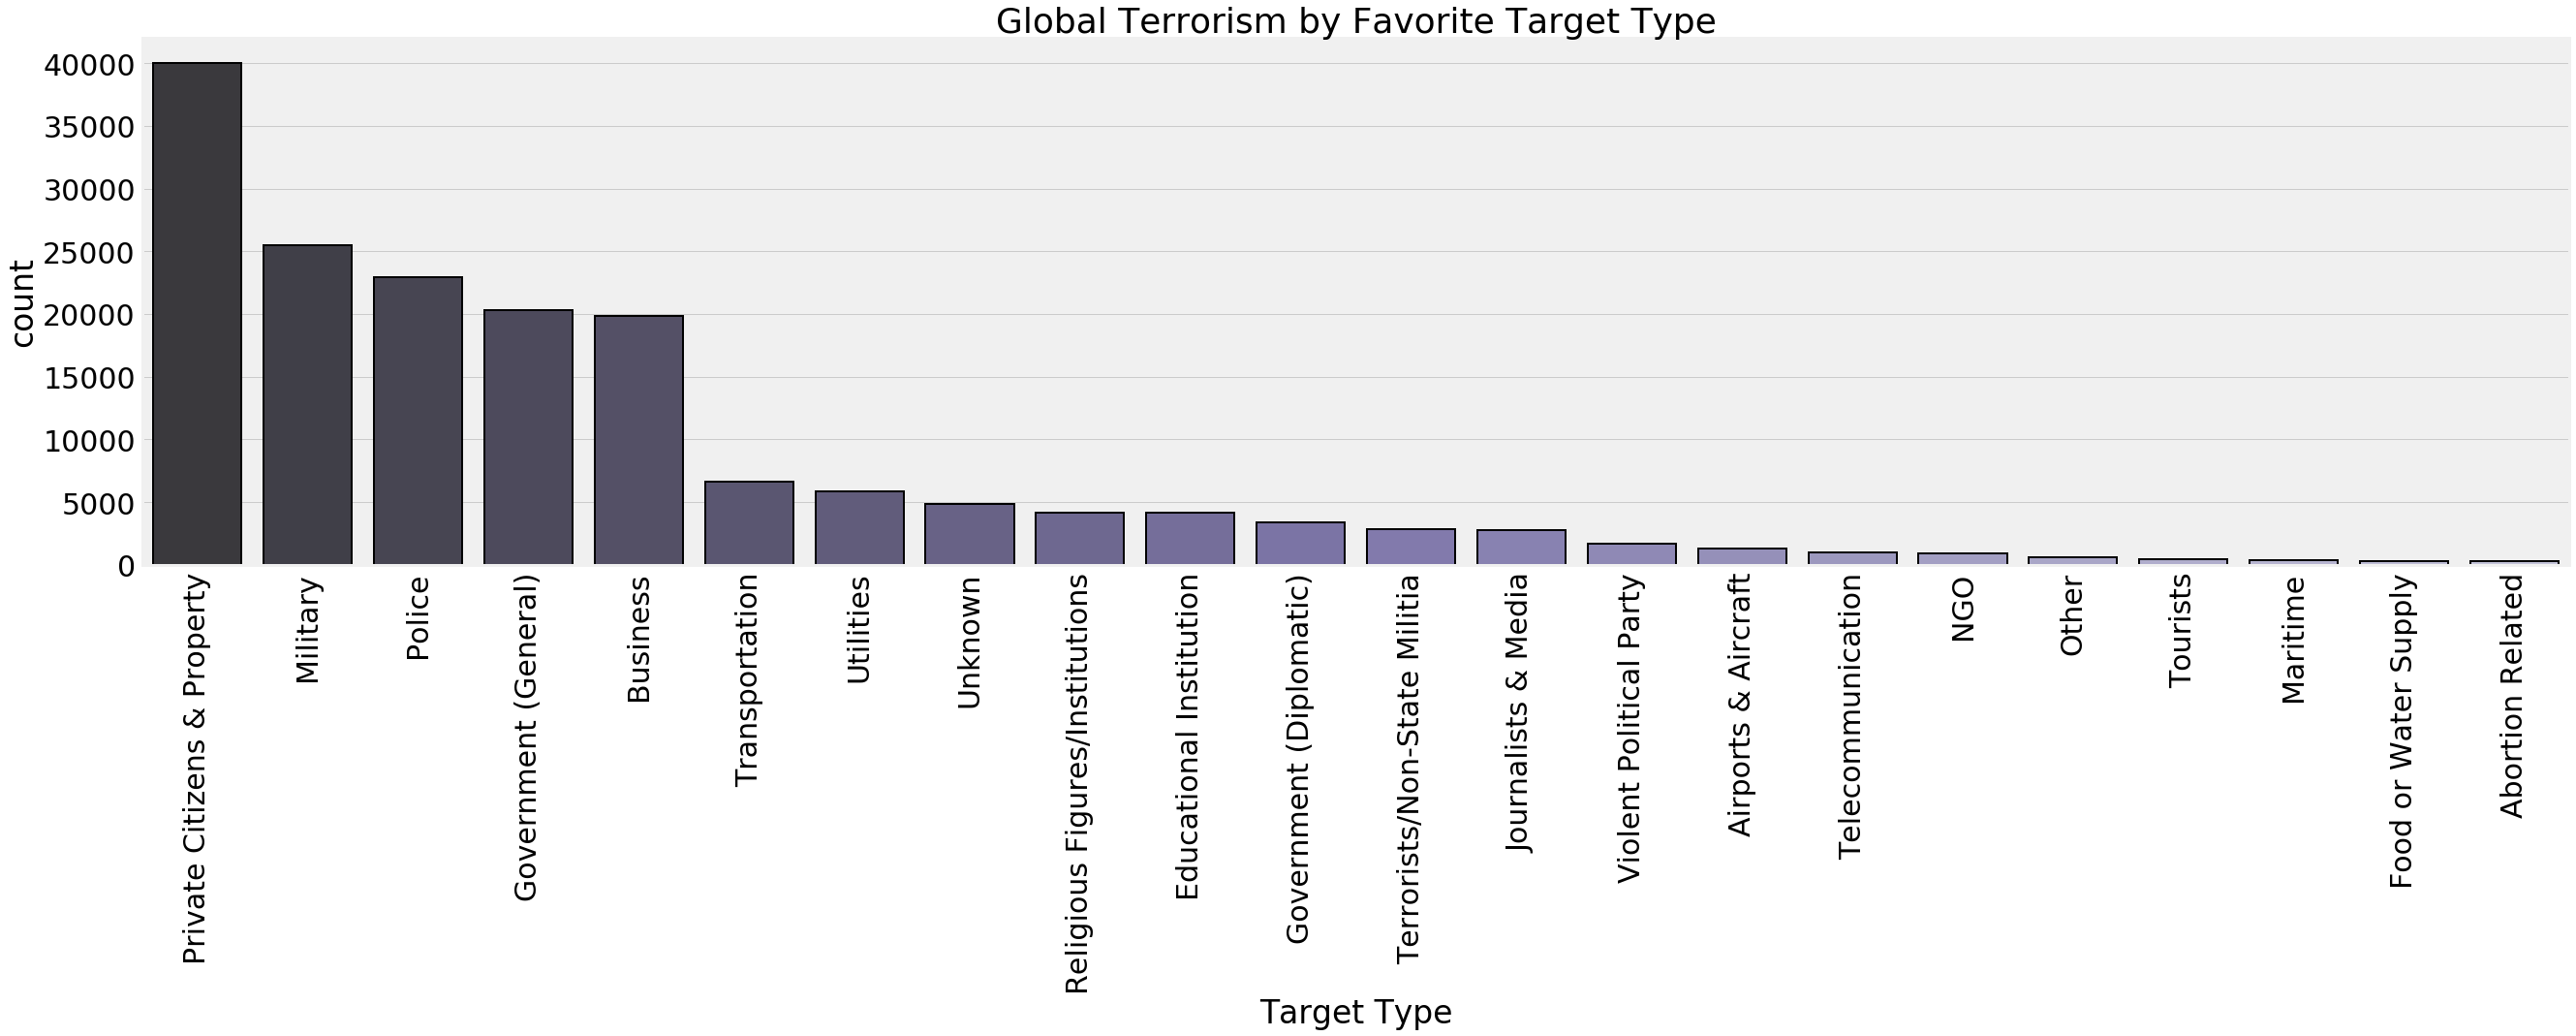

In [13]:
# Favorite targets
plt.figure(figsize=(40,10))
sns.set_context('notebook', font_scale=3.0)
g = sns.countplot(x='Target_type', data=terror, palette='Purples_d', order=terror['Target_type'].value_counts().index, 
                  edgecolor='black', linewidth=2.0)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Global Terrorism by Favorite Target Type')

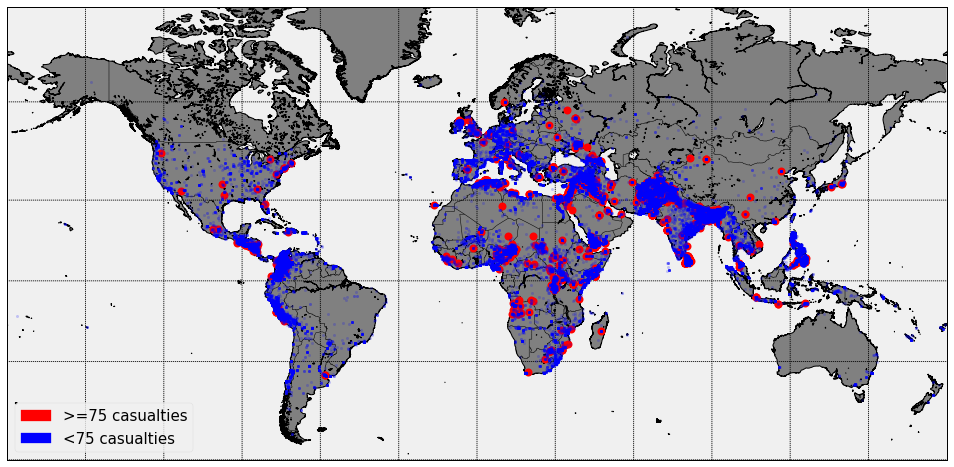

In [20]:
plt.figure(figsize=(15,10))
m = Basemap(projection='mill', llcrnrlon=-180, llcrnrlat=-60, urcrnrlat=80, urcrnrlon=180, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'gray')
m.drawmapboundary()
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))

# plot circle markers on maps
lat_100=list(terror[terror['Casualties']>=75].latitude)
long_100=list(terror[terror['Casualties']>=75].longitude)
x_100, y_100 = m(long_100, lat_100)
m.plot(x_100, y_100,'ro',markersize=8)

lat_10=list(terror[terror['Casualties']<75].latitude)
long_10=list(terror[terror['Casualties']<75].longitude)
x_10, y_10 = m(long_10, lat_10)
m.plot(x_10, y_10, 'bo', markersize=3, alpha=0.2)

plt.gcf()
a = mpatches.Patch(color='red', label='>=75 casualties')
b = mpatches.Patch(color='blue', label='<75 casualties')
plt.legend(loc='lower left', handles=[a,b], prop={'size':'15'})
